<a href="https://colab.research.google.com/github/rohitrawate/Engineering/blob/main/DL-Docs/FNN_SGD.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Rohit Rawate** 

*2.FNN using Keras and TensorFLow*

Assignment : Deep Learning 

In [22]:
from sklearn.preprocessing import LabelBinarizer
from sklearn.metrics import classification_report
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential

from keras.layers import Dense
from keras.optimizers import SGD
from keras.datasets import mnist


In [23]:
from keras import backend as K
import matplotlib.pyplot as plt
import numpy as np
import argparse
import random

In [24]:
print("[INFO accessing MNIST...]")
((X_train, Y_train), (X_test, Y_test)) = mnist.load_data()

[INFO accessing MNIST...]


In [25]:
X_train.shape


(60000, 28, 28)

In [26]:
X_test.shape

(10000, 28, 28)

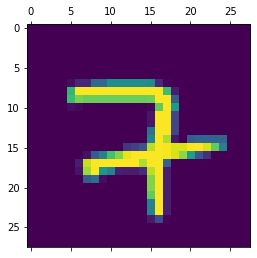

In [27]:
# plt.matshow(X_train[0])
plt.matshow(X_train[38])


In [28]:
X_train = X_train.reshape((X_train.shape[0] , 28*28*1))
X_test = X_test.reshape((X_test.shape[0] , 28*28*1))
X_train =X_train.astype("float32")/ 255
X_test =X_test.astype("float32")/ 255


In [29]:
X_test.shape # (10000, 784)

X_train.shape # (60000, 784)

(60000, 784)

In [30]:
Y_train.shape # (60000,)
Y_test.shape  # (10000 ,)

(10000,)

In [31]:
lb = LabelBinarizer()
Y_train = lb.fit_transform(Y_train)
Y_test  =  lb.transform(Y_test)

In [32]:
Y_train.shape #(60000, 10)
Y_test.shape  # (10000, 10)

(10000, 10)

In [33]:
# building the model 
model = Sequential()
keras.layers.Flatten(input_shape=(28, 28)),
model.add(Dense(128 , input_shape = (784,) , activation= 'sigmoid') )
model.add(Dense(64 , activation = 'sigmoid'))
model.add(Dense (10 , activation = 'softmax'))

In [34]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 128)               100480    
                                                                 
 dense_4 (Dense)             (None, 64)                8256      
                                                                 
 dense_5 (Dense)             (None, 10)                650       
                                                                 
Total params: 109,386
Trainable params: 109,386
Non-trainable params: 0
_________________________________________________________________


In [36]:
sgd = SGD(0.01)
epochs =10
# loss='binary_crossentropy' activation='sigmoid'
model.compile( loss = "categorical_crossentropy" , optimizer=sgd , metrics=["accuracy"])
# model.compile( loss='sparse_categorical_crossentropy', optimizer=sgd , metrics=["accuracy"])

#  H (history)
history = model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=14, batch_size=128)



Epoch 1/14
469/469 [==============================] - 6s 11ms/step - loss: 2.2802 - accuracy: 0.1899 - val_loss: 2.2455 - val_accuracy: 0.2835
Epoch 2/14
469/469 [==============================] - 2s 5ms/step - loss: 2.2188 - accuracy: 0.3860 - val_loss: 2.1851 - val_accuracy: 0.4489
Epoch 3/14
469/469 [==============================] - 3s 6ms/step - loss: 2.1504 - accuracy: 0.5245 - val_loss: 2.1039 - val_accuracy: 0.5690
Epoch 4/14
469/469 [==============================] - 2s 5ms/step - loss: 2.0547 - accuracy: 0.5849 - val_loss: 1.9879 - val_accuracy: 0.6496
Epoch 5/14
469/469 [==============================] - 2s 5ms/step - loss: 1.9187 - accuracy: 0.6278 - val_loss: 1.8276 - val_accuracy: 0.6492
Epoch 6/14
469/469 [==============================] - 3s 6ms/step - loss: 1.7415 - accuracy: 0.6505 - val_loss: 1.6334 - val_accuracy: 0.6858
Epoch 7/14
469/469 [==============================] - 3s 6ms/step - loss: 1.5451 - accuracy: 0.6847 - val_loss: 1.4374 - val_accuracy: 0.7132
Epoch

In [39]:
from tensorflow.python.ops.math_ops import argmax
#making the predictions
predictions = model.predict(X_test, batch_size = 128)
print("Classification Report\n " + classification_report(Y_test.argmax(axis=1), predictions.argmax(axis=1) , target_names= [str(x) for x in lb.classes_]) )
print(predictions.argmax(axis=1))

79/79 [==============================] - 1s 7ms/step
Classification Report
               precision    recall  f1-score   support

           0       0.89      0.96      0.92       980
           1       0.86      0.98      0.92      1135
           2       0.87      0.83      0.85      1032
           3       0.80      0.85      0.82      1010
           4       0.78      0.75      0.77       982
           5       0.82      0.67      0.74       892
           6       0.85      0.92      0.88       958
           7       0.87      0.88      0.87      1028
           8       0.85      0.72      0.78       974
           9       0.72      0.76      0.74      1009

    accuracy                           0.83     10000
   macro avg       0.83      0.83      0.83     10000
weighted avg       0.83      0.83      0.83     10000

[7 2 1 ... 9 5 6]


In [40]:
test_loss,test_acc=model.evaluate(X_test, Y_test)
print("Loss=%.3f" %test_loss)
print("Accuracy=%.3f" %test_acc)


313/313 [==============================] - 1s 2ms/step - loss: 0.7111 - accuracy: 0.8338
Loss=0.711
Accuracy=0.834


Making Prediction on New Data



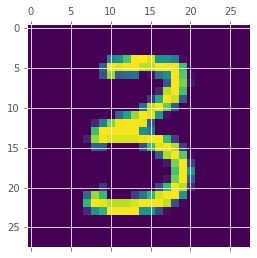

In [ ]:
n=random.randint(0,9999)
# plt.imshow(x_test[n])
plt.matshow(X_test[n])
plt.show()
# n

In [ ]:
# #we use predict() on new data
# predicted_value= model.predict(X_test)
# print("Handwritten number in the image is= %d" %np.argmax(predicted_value[n]))

In [41]:
history.history.keys()


dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

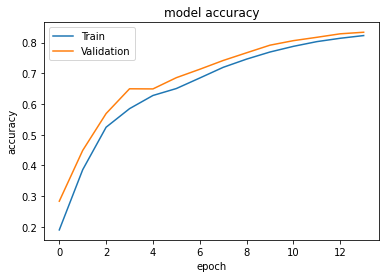

In [43]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

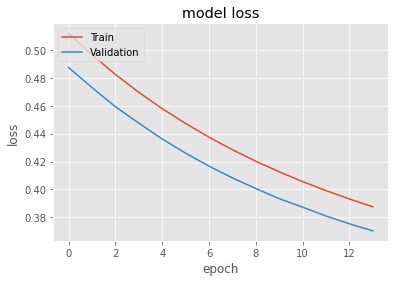

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

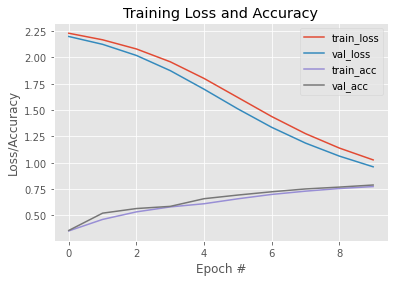

In [ ]:
# plt.style.use("ggplot")
plt.figure()
plt.plot(np.arange(0 , epochs), history.history["loss"], label="train_loss")
plt.plot(np.arange(0, epochs), history.history["val_loss"], label = "val_loss")
plt.plot(np.arange(0, epochs), history.history["accuracy"] , label= "train_acc")
plt.plot(np.arange(0, epochs), history.history["val_accuracy"], label= "val_acc")
plt.title("Training Loss and Accuracy")
plt.xlabel("Epoch #")
plt.ylabel("Loss/Accuracy")
plt.legend()

In [ ]:
from google.colab import drive
drive.mount('/content/drive')